In [1]:
import csv
get_ipython().magic(u'matplotlib inline')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as math
import datetime as dt 
import random
import heapq
import operator

In [6]:
# ditonary of most purchase products
train = open('Downloads/instacart_2017_05_01/order_products__train.csv','rb')
train = csv.reader(train)
hist = {}
for i,x in enumerate(train):
    if i > 0:
        hist[x[1]] = hist.get(x[1],0) + 1

In [8]:
# sort histogram
sorted_hist = sorted(hist.items(),key=operator.itemgetter(1))[::-1][50:100]

In [28]:
# product dictionary
products = open('Downloads/instacart_2017_05_01/products.csv','rb')
products = csv.reader(products)
product_dict = {}
for i,x in enumerate(products):
    if i > 0:
        product_dict[x[0]] = x[1]

In [14]:
for i in sorted_hist:
    print product_dict[i[0]]

In [ ]:
# most ordered train
for i in sorted_hist[-10:]:
    print product_dict[i[0]],i[1]

In [ ]:
# product list by aisle
products = csv.reader(open('Downloads/instacart_2017_05_01/products.csv' 'rb'))
for ix in enumerate(products):
#     if i == 10:
#         break
#     print x
    if x[2] == '64':
        print x

In [31]:
def build_control(number_products,number_orders):

#     load orders and calculate the most orders items

    train = csv.reader(open('Downloads/instacart_2017_05_01/order_products__train.csv','rb'))
    hist = {}
    order_ids = []

    for i,x in enumerate(train):
        order_ids.append(x[0])
        if i > 0:
            hist[x[1]] = hist.get(x[1],0) + 1

    order_ids_set = set(order_ids)

#     build a dictionary for the columns using the product ids of the most ordered items 

    most_purchased_products = heapq.nlargest(number_products,hist,key=hist.__getitem__)

    columns_2_products_dict = dict(zip(range(len(most_purchased_products)), most_purchased_products))
    columns_2_products_dict1 = dict(zip(most_purchased_products,range(len(most_purchased_products))))
    columns_2_products_dict.update(columns_2_products_dict1)

#     randomly pick orderids and then build a dictionary for the rows

    control_orders = random.sample(order_ids_set,number_orders)

    control_orders_dict = dict(zip(range(number_orders),control_orders))
    control_orders_dict1 = dict(zip(control_orders,range(number_orders)))
    control_orders_dict.update(control_orders_dict1)

#     create matrix and then populate using orders and products

    control_matrix = np.zeros(shape=(number_orders,number_products))

    order_set = csv.reader(open('Downloads/instacart_2017_05_01/order_products__train.csv','rb'))

    for x in order_set:
        if (x[0] in control_orders) and (x[1] in most_purchased_products):
            control_matrix[control_orders_dict[x[0]],columns_2_products_dict[x[1]]] = 1

    control_matrix_product = np.dot(np.transpose(control_matrix),control_matrix)    
    control_matrix_product_percent = control_matrix_product / number_orders

    return columns_2_products_dict, control_matrix_product_percent

In [80]:
def compare_two_products(products_2_display,\
                         product_one,product_one_exclusions,\
                         product_two,product_two_exclusions,\
                         columns_2_products_dict,population_matrix,number_orders): 

#     use the numbers of products from the dictionary provided

    number_products = len(columns_2_products_dict)/2

#     find the product ids for the two products amongst the dictionary items
# and then create their dictionaries to get from product ids to columns

    first_set = []
    second_set = []

    for i in product_dict:
        if (product_one in product_dict[i]) and\
        all([x not in product_dict[i] for x in product_one_exclusions]):
            first_set.append(i)

        if (product_two in product_dict[i]) and\
        all([v not in product_dict[i] for v in product_two_exclusions]):
            second_set.append(i)

    product_one_dict = dict(zip(range(len(first_set)),first_set))
    product_one_dict1 = dict(zip(first_set,range(len(first_set))))
    product_one_dict.update(product_one_dict1)

    product_two_dict = dict(zip(range(len(second_set)),second_set))
    product_two_dict1 = dict(zip(second_set,range(len(second_set))))
    product_two_dict.update(product_two_dict1)

    order_set = csv.reader(open('Downloads/instacart_2017_05_01/order_products__train.csv', 'rb'))

    first_set_orders = []
    second_set_orders = []
#     control_orders = []

# find orders with the respective items and sample from them  

    for x in order_set:
        if (x[1] in first_set):
            first_set_orders.append(x[0])

        if (x[1] in second_set):
            second_set_orders.append(x[0])

#         if (x[1] not in first_set) and (x[1] not in second_set):
#             control_orders.append(x[0])

    first_total_products = len(first_set_orders)
    second_total_products = len(second_set_orders)

    first_set_orders = set(first_set_orders)
    second_set_orders = set(second_set_orders)
#     control_orders = set(control_orders)

    first_unique_orders = len(first_set_orders)
    second_unique_orders = len(second_set_orders)

    if len(first_set_orders) > number_orders:
        first_set_orders = random.sample(first_set_orders, number_orders)

    if len(second_set_orders) > number_orders:
        second_set_orders = random.sample(second_set_orders, number_orders)

#     control_orders = random.sample(control_orders number_orders)

#     build the order dictionaries to map to rows

    orders_one_dict = dict(zip(range(len(first_set_orders)), first_set_orders))
    orders_one_dict1 = dict(zip(first_set_orders,range(len(first_set_orders))))
    orders_one_dict.update(orders_one_dict1)

    orders_two_dict = dict(zip(range(len(second_set_orders)), second_set_orders))
    orders_two_dict1 = dict(zip(second_set_orders,range(len(second_set_orders))))
    orders_two_dict.update(orders_two_dict1)

#     control_orders_dict = dict(zip(range(number_orders) control_orders))
#     control_orders_dict1 = dict(zip(control_ordersrange(number_orders)))
#     control_orders_dict.update(control_orders_dict1)

#     create and build matrices with orders as rows and products as columns

    word_one_matrix = np.zeros(shape=(min(number_orders,len(first_set_orders)),len(first_set)))
    word_two_matrix = np.zeros(shape=(min(number_orders,len(second_set_orders)),len(second_set)))

    word_one_orders = np.zeros(shape=(min(number_orders,len(first_set_orders)),number_products))
    word_two_orders = np.zeros(shape=(min(number_orders,len(second_set_orders)),number_products))

#     control_matrix = np.zeros(shape=(number_ordersnumber_products))

    order_set = csv.reader(open('Downloads/instacart_2017_05_01/order_products__train.csv', 'rb'))

    first_order_count = 0
    second_order_count = 0
    first_order_product_count = 0
    second_order_product_count = 0

    for x in order_set:
        if (x[0] in first_set_orders) and (x[1] in columns_2_products_dict.values()):
            word_one_orders[orders_one_dict[x[0]],columns_2_products_dict[x[1]]] = 1
            first_order_count +=1
        if (x[0] in second_set_orders) and (x[1] in columns_2_products_dict.values()):
            word_two_orders[orders_two_dict[x[0]],columns_2_products_dict[x[1]]] = 1
            second_order_count +=1
        if (x[0] in first_set_orders) and (x[1] in first_set):
            word_one_matrix[orders_one_dict[x[0]],product_one_dict[x[1]]] = 1
            first_order_product_count+=1
        if (x[0] in second_set_orders) and (x[1] in second_set):
            word_two_matrix[orders_two_dict[x[0]],product_two_dict[x[1]]] = 1    
            second_order_product_count +=1
#         if (x[0] in control_orders) and (x[1] in most_purchased_products):
#             control_matrix[control_orders_dict[x[0]]columns_2_products_dict[x[1]]] = 1

#     print product_one'Type Products in Each Order:'round(first_order_product_count / len(first_set_orders)1) 
#     print product_two'Type Products in Each Order:'round(second_order_product_count / len(second_set_orders)1) 

#     print \\\    

    print product_one,'Order Set Size:',first_unique_orders
    print product_one,'Order Sample Size:',min(first_unique_orders,number_orders)
#     print product_one'Type Products in Each Order:'float(first_total_products) / first_unique_orders
    print product_one,'Products in Each Order:',round(float(first_order_product_count) / len(first_set_orders),2)
    print 'Average Products (in Product Sample) Per Order:',round(float(first_order_count) / len(first_set_orders),2) 

    if(product_one_exclusions):
        print 'Product One Exclusions:',[i for i in product_one_exclusions]

    print '\n'  

    print product_two,'Order Set Size:',second_unique_orders
    print product_two,'Order Sample Size:',min(second_unique_orders,number_orders)
    print product_two,'Products in Each Order:',round(float(second_order_product_count) / len(second_set_orders),2)
    print 'Average Products (in Product Sample) Per Order:',round(float(second_order_count) / len(second_set_orders),2)              
    if(product_two_exclusions):
        print 'Product Two Exlusions:',[i for i in product_two_exclusions]

    print '\n'

    print 'Product Sample Size:',number_products,'most purchased products'

    print '\n'

#     calculate products occurances by taking the product (PX0) * (OXP) and then dividing by number of orders

    word_one_matrix_product = np.dot(np.transpose(word_one_matrix),word_one_matrix)
    word_two_matrix_product = np.dot(np.transpose(word_two_matrix),word_two_matrix)

    word_one_orders_product = np.dot(np.transpose(word_one_orders),word_one_orders)
    word_two_orders_product = np.dot(np.transpose(word_two_orders),word_two_orders)

    word_one_orders_product_percent = word_one_orders_product/len(first_set_orders)
    word_two_orders_product_percent = word_two_orders_product/len(second_set_orders)

#     control_matrix_product = np.dot(np.transpose(control_matrix)control_matrix)    
#     control_matrix_product_percent = control_matrix_product / number_orders

#     product_one_difference = word_one_orders_product_percent / control_matrix_product_percent
#     product_two_difference = word_two_orders_product_percent / control_matrix_product_percent

    product_difference_one_two = word_one_orders_product_percent / word_two_orders_product_percent
    product_difference_two_one = word_two_orders_product_percent / word_one_orders_product_percent

#     print 'control_matrix_product_percent'control_matrix_product_percent.shape
#     print 'word_one_orders_product_percent'word_one_orders_product_percent.shape
#     print 'population_matrix'population_matrix.shape

    population_one_difference = word_one_orders_product_percent / population_matrix
    population_two_difference = word_two_orders_product_percent / population_matrix


    print 'Top',product_one,'Products'
    for i in range(products_2_display):
        print i+1, \
        product_dict[product_one_dict[np.argsort(np.diag(word_one_matrix_product))[::-1][i]]],\
        round(np.sort(np.diag(word_one_matrix_product))[::-1][i]/len(first_set_orders)*100,2),'%'
    print '\n'

    print 'Top',product_two,'Products'
    for i in range(products_2_display):
        print i+1, \
        product_dict[product_two_dict[np.argsort(np.diag(word_two_matrix_product))[::-1][i]]],\
        round(np.sort(np.diag(word_two_matrix_product))[::-1][i]/len(second_set_orders)*100,2),'%'
    print '\n'

#     print \Products More Prevalent in\product_one\Orders vs. Control\
#     count=0
#     i = 0
#     while count < 10:
#         if (columns_2_products_dict[np.argsort(np.diag(product_one_difference))[::-1][i]] not in first_set) and \\
#         (~np.isnan(np.sort(np.diag(product_one_difference))[::-1][i])):
#             count +=1        
#             print count \\
#             product_dict[columns_2_products_dict[np.argsort(np.diag(product_one_difference))[::-1][i]]] \\
#             round(np.sort(np.diag(product_one_difference))[::-1][i]2)\x\
#             i += 1        
#         else:
#             i += 1
#     print \\\

#     print \Products More Prevalent in\product_two\Orders vs. Control\
#     count=0
#     i = 0
#     while count < 10:
#         if (columns_2_products_dict[np.argsort(np.diag(product_two_difference))[::-1][i]] not in second_set) and \\
#         (~np.isnan(np.sort(np.diag(product_two_difference))[::-1][i])):
#             count +=1        
#             print count \\
#             product_dict[columns_2_products_dict[np.argsort(np.diag(product_two_difference))[::-1][i]]] \\
#             round(np.sort(np.diag(product_two_difference))[::-1][i]2)\x\
#             i += 1        
#         else:
#             i += 1
#     print \\\

    print 'Products More Prevalent in',product_one,'vs.',product_two
    count=0
    i = 0
    while count < 10:
        if (columns_2_products_dict[np.argsort(np.diag(product_difference_one_two))[::-1][i]] not in first_set) and \
        (~np.isnan(np.sort(np.diag(product_difference_one_two))[::-1][i])):
            count +=1        
            print count, \
            product_dict[columns_2_products_dict[np.argsort(np.diag(product_difference_one_two))[::-1][i]]],\
            round(np.sort(np.diag(product_difference_one_two))[::-1][i],2),'x'
            i += 1        
        else:
            i += 1
    print '\n'

    print 'Products More Prevalent in',product_two,'vs.',product_one
    count=0
    i = 0
    while count < 10:
        if (columns_2_products_dict[np.argsort(np.diag(product_difference_two_one))[::-1][i]] not in second_set) and \
        (~np.isnan(np.sort(np.diag(product_difference_two_one))[::-1][i])):
            count +=1        
            print count, \
            product_dict[columns_2_products_dict[np.argsort(np.diag(product_difference_two_one))[::-1][i]]], \
            round(np.sort(np.diag(product_difference_two_one))[::-1][i],2),'x'
            i += 1        
        else:
            i += 1
    print '\n'

    print 'Products More Prevalent in',product_one,'Orders vs. Population'
    count=0
    i = 0
    while count < 10:
        if (columns_2_products_dict[np.argsort(np.diag(population_one_difference))[::-1][i]] not in first_set) and \
        (~np.isnan(np.sort(np.diag(population_one_difference))[::-1][i])):
            count +=1        
            print count,\
            product_dict[columns_2_products_dict[np.argsort(np.diag(population_one_difference))[::-1][i]]],\
            round(np.sort(np.diag(population_one_difference))[::-1][i],2),'x'
            i += 1        
        else:
            i += 1
    print '\n'

    print 'Products More Prevalent in',product_two,'Orders vs. Population'
    count=0
    i = 0
    while count < 10:
        if (columns_2_products_dict[np.argsort(np.diag(population_two_difference))[::-1][i]] not in second_set) and \
        (~np.isnan(np.sort(np.diag(population_two_difference))[::-1][i])):
            count +=1        
            print count, \
            product_dict[columns_2_products_dict[np.argsort(np.diag(population_two_difference))[::-1][i]]], \
            round(np.sort(np.diag(population_two_difference))[::-1][i],2),'x'
            i += 1        
        else:
            i += 1
    print '\n'

    return population_one_difference

In [95]:
for i in product_dict:
    if 'Kale' in product_dict[i]:
        print product_dict[i]

Soup, Golden Quinoa and Kale
Vegetable Salad Kit, Sweet Kale
Kale & Sea Salt Popcorn
Original Kale Chips
Power Essence Kale & Shredded Brussels Sprouts
Organic Kale Krunch Superfood
Homestyle Meals Apple, Raspberry, Kale & Amaranth (Stage 2 for 6+ Months)
Chocolate Kale Krunch
Kale Apple Greens
Vegetable, Kale & Quinoa Soup Mix
100% Baby Kale
Legume Bowls Green Chickpeas, Kale, Potato, Tomato & Rosemary
Pressed Pineapple Banana Kale Bar
Mango Habanero Kale Chips
Organic Sweet Kale Blend
Kale Apple Detox Ice Pops
Organic Kale Pesto Hummus
Kale & Beet Salad
Chopped Kale Apple Veggie Salad
Sweet Kale Chopped Salad
Organic Lacinato (Dinosaur) Kale
Salad Love Kale Parmesan Dressing
Organic Rainbow Kale
Raw Vegan Spicy Miso Kale Chips
Spinach & Kale Corn Chips with Sea Salt
Baby Kale & Spinach Juicing Greens
Kale Ceasar Salad Kit
Organic Baby Kale Mix
Juice Beverage, Cold Pressed, Kale Apple Ginger Romaine Spinach Cucumber Celery Parsley Lemon
Kale
Stage 2 Spinach, Apple & Kale
Original Chee

In [32]:
columns_dict, population_matrix = build_control(1000,20000)

In [81]:
population_one = compare_two_products(5,'Coke',['Kid','Smoothie'],\
                         'Pepsi',[],\
                         columns_dict,population_matrix,400)

Coke Order Set Size: 1924
Coke Order Sample Size: 400
Coke Products in Each Order: 1.09
Average Products (in Product Sample) Per Order: 4.18
Product One Exclusions: ['Kid', 'Smoothie']


Pepsi Order Set Size: 229
Pepsi Order Sample Size: 229
Pepsi Products in Each Order: 1.02
Average Products (in Product Sample) Per Order: 4.24


Product Sample Size: 1000 most purchased products


Top Coke Products
1 Coke Classic 29.0 %
2 Coke Zero 17.25 %
3 Diet Coke 16.75 %
4 Diet Coke Caffeine Free Soda 6.75 %
5 Diet Coke Soda 6.5 %


Top Pepsi Products
1 Diet Pepsi Pack 61.14 %
2 Diet Pepsi 20.52 %
3 Diet Pepsi Slim Cans 10.92 %
4 Pepsi 4.37 %
5 Diet Pepsi Soda 3.93 %


Products More Prevalent in Coke vs. Pepsi
1 Classic Yellow Mustard inf x
2 Pineapple Chunks inf x
3 Total Greek Strained Yogurt inf x
4 Milk, Organic, Vitamin D inf x
5 No Pulp Calcium & Vitamin D Pure Orange Juice inf x
6 Organic Bell Pepper inf x
7 Trilogy Kombucha Drink inf x
8 Organic Vegetable Broth inf x
9 Sliced White Mushroo

In [ ]:
population_one = compare_two_products('Clementine',['Anti','Dish','Soap','Water','Juice','Sparkling','Beverage'],\
                         'Orange',['Zero','Carrot','Drink','Gel','Peach','Cold','Can','Puree','Chick','Beverage','Conditioner','Yogurt','Juice','Soda','Water','Cookie','Energy','Shots','Children','Vitamin','Liquid','Marmalade','Cream','Extract','Cleaner','Vodka','Bar','Liqueur','Chew','Clean','Pepper','Cough'],\
                         columns_dict,population_matrix,2000)

In [94]:
order_set = csv.reader(open('Downloads/instacart_2017_05_01/order_products__train.csv', 'rb'))

for i,x in enumerate(order_set):
#     print i
#     if i > 3:
#         break
#     prit x[0]
    if x[0] == '1':
        print product_dict[x[1]]

Bulgarian Yogurt
Organic 4% Milk Fat Whole Milk Cottage Cheese
Organic Celery Hearts
Cucumber Kirby
Lightly Smoked Sardines in Olive Oil
Bag of Organic Bananas
Organic Hass Avocado
Organic Whole String Cheese


In [284]:
# build food item by user matrix

number_products = 2000
number_users = 20000

# using top 10000 products
train = csv.reader(open('Downloads/instacart_2017_05_01/order_products__train.csv','rb'))
hist = {}
order_ids = []

for i,x in enumerate(train):
    order_ids.append(x[0])
    if i > 0:
        hist[x[1]] = hist.get(x[1],0) + 1

print 'top products identified'

order_ids_set = set(order_ids)
products_set = heapq.nlargest(number_products,hist,key=hist.__getitem__)

# dictionary for rows to products

row_2_products_dict = dict(zip(range(len(products_set)), products_set))
row_2_products_dict1 = dict(zip(products_set,range(len(products_set))))
row_2_products_dict.update(row_2_products_dict1)

# users go from 1 to 206209
user_ids = range(1,206210)

# randomly pick 2000 numbers from the above
user_ids_used = random.sample(user_ids, number_users)
user_ids_strings = []

for i in user_ids_used:
    user_ids_strings.append(str(i))

# find all the order numbers of these users in a dictionary
order_csv = csv.reader(open('Downloads/instacart_2017_05_01/orders.csv','rb'))

user_orders_list_individual = []
user_orders_list_lists = []
user_orders_all = []
user_dict = {}
user_position = 0

last_order_id = 'user_id'

for count,i in enumerate(order_csv):
#     print i[0]
#     if i[1] == '1':
#     print i[2]
#     if count > 10000:
#         break
    if i[1] != last_order_id:
        if i[1] != '1':
            user_orders_list_lists.append(user_orders_list_individual)
            user_orders_list_individual = []
            user_position += 1
    if i[1] in user_ids_strings and i[2] == 'prior':
#         print i[0]
        user_orders_all.append(i[0])
        user_orders_list_individual.append(i[0])
        last_order_id = i[1]
        user_dict[i[0]] = i[1]
# print user_orders_list_lists

# dictionary for columns to users

print 'list of user order lists built'

columns_2_users_dict = dict(zip(range(len(user_ids_strings)), user_ids_strings))
columns_2_users_dict1 = dict(zip(user_ids_strings,range(len(user_ids_strings))))
columns_2_users_dict.update(columns_2_users_dict1)

# create product x user matrix of zeros

product_users_matrix = np.zeros(shape=(number_products,number_users))

# if the order is in the big order list, and the product
# is in the top 2000 products, increment appropriate cell by one

order_set = csv.reader(open('Downloads/instacart_2017_05_01/order_products__prior.csv', 'rb'))

# first_order_count = 0
# second_order_count = 0
# first_order_product_count = 0
# second_order_product_count = 0

for count,x in enumerate(order_set):
    if (x[0] in user_orders_all) and (x[1] in products_set):
#         print 'yes'
        product_users_matrix[row_2_products_dict[x[1]],columns_2_users_dict[user_dict[x[0]]]] += 1
    if count % 2000000 == 0:
        print 'Q sum of matrix:',np.sum(product_users_matrix)


# run NMF on the matrix, learn topics, look at foods that are highest in waht looks like healthy topics

# see what each users distiburtion of the healthy factor
# (which coudl be just one topic learned or maybe combination of topics) is
# so do people just buy healthy foods or do they buy across the spectrum
# does someone who buys an unhealthy item like coke, buy only unhealthy?
# 1 healthy item? 2?

top products identified
list of user order lists built
Q sum of matrix: 0.0
Q sum of matrix: 130265.0
Q sum of matrix: 257806.0
Q sum of matrix: 384009.0
Q sum of matrix: 512242.0
Q sum of matrix: 640367.0
Q sum of matrix: 768956.0
Q sum of matrix: 898155.0
Q sum of matrix: 1025019.0
Q sum of matrix: 1150829.0
Q sum of matrix: 1277820.0
Q sum of matrix: 1405350.0
Q sum of matrix: 1532329.0
Q sum of matrix: 1659256.0
Q sum of matrix: 1786793.0
Q sum of matrix: 1914950.0
Q sum of matrix: 2042218.0


In [286]:
product_users_matrix_int = product_users_matrix.astype(np.int)

In [291]:
np.savetxt('product_users_matrix_2000products_20000users.csv', product_users_matrix_int, delimiter=',')  

In [290]:
product_users_matrix_int[0]

array([1, 0, 8, ..., 2, 0, 0])

In [307]:
np.random.seed(0)
matrix_w = np.random.rand(number_products,35)
matrix_h = np.random.rand(35,product_users_matrix_int.shape[1])
objec_func_list = []

for t in range(0,101):
    
    matrix_w_h = np.dot(matrix_w,matrix_h) + 10**-16
    
    matrix_w_x_div_wh = np.dot(np.transpose(matrix_w),(product_users_matrix_int / matrix_w_h))

    for i in range(0,matrix_h.shape[0]):
        for j in range(0,matrix_h.shape[1]):
            matrix_h[i,j] = matrix_h[i,j] * matrix_w_x_div_wh[i,j] / max(np.sum(matrix_w[:,i]),10**-16)
    
    matrix_w_h = np.dot(matrix_w,matrix_h) + 10**-16
    
    matrix_h_x_div_wh = np.dot((product_users_matrix_int / matrix_w_h), np.transpose(matrix_h))                                        

    for i in range(0,matrix_w.shape[0]):
        for j in range(0,matrix_w.shape[1]):
            matrix_w[i,j] = matrix_w[i,j] * matrix_h_x_div_wh[i,j] / max(np.sum(matrix_h[j,:]),10**-16)
    
    if t % 25 == 0:
        print '25% complete'
        objec = 0
        matrix_w_h = np.dot(matrix_w,matrix_h)
        for i in range(0,matrix_w.shape[0]):
            for j in range(0,matrix_h.shape[1]):
                objec += (product_users_matrix_int[i,j] * np.log(1/max(matrix_w_h[i,j],10**-16))) + matrix_w_h[i,j]

        objec_func_list.append(objec)

25% complete
25% complete
25% complete
25% complete
25% complete


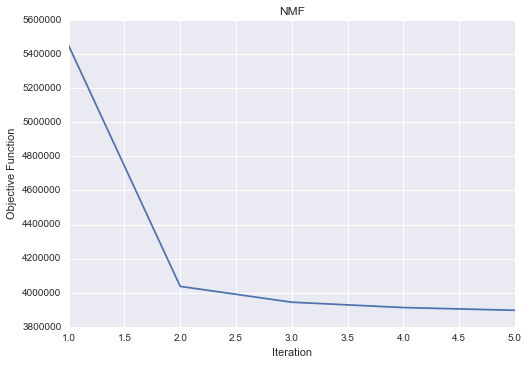

In [296]:
plt.figure()
plt.plot(range(1,6), objec_func_list, "-")
plt.xlabel('Iteration')
plt.ylabel('Objective Function')
# plt.legend(loc='lower right')
plt.title('NMF')

In [308]:
# copy

matrix_w2 = matrix_w
matrix_h2 = matrix_h

# matrix_w2_18_full_2000_20000 = matrix_w
# matrix_h2_18_full_2000_20000 = matrix_h

# matrix_w2_18_usersum10 = matrix_w
# matrix_h2_18_usersum10 = matrix_h

# matrix_w2_12_usersum10 = matrix_w
# matrix_h2_12_usersum10 = matrix_h

# matrix_w2_20 = matrix_w
# matrix_h2_20 = matrix_h

# matrix_w2_7 = matrix_w
# matrix_h2_7 = matrix_h

In [298]:
matrix_h.shape[0]

18

In [309]:
# normalize
for i in range(0,matrix_w2.shape[1]):
    column_sum = matrix_w2[:,i].sum()
    matrix_w2[:,i] = matrix_w2[:,i] / column_sum
for i in range(0,matrix_h2.shape[0]):
    row_sum = matrix_h2[i,:].sum()
    matrix_h2[i,:] = matrix_h2[i,:] / row_sum

In [310]:
word_table = pd.DataFrame()

# matrix_w2.shape[1]

for i in range(0,matrix_w2.shape[1]):
    top_10_words = []
    top_10_weights2 = []
    top_10_weights = np.sort(matrix_w2[:,i])[::-1][:40]
    
    word_pos = np.argsort(matrix_w2[:,i])[::-1][:40]

    for p in word_pos:
        top_10_words.append(product_dict[row_2_products_dict[p]])
        
#     print top_10_weights,top_10_words
    
    for p in top_10_weights:
        top_10_weights2.append(round(p,4))
    
    temp = pd.DataFrame({str(i+1)+'a': top_10_words, str(i+1)+'b': top_10_weights2})

    frames = [word_table,temp]
    
    word_table = pd.concat(frames,axis=1)
       
word_table.index = word_table.index + 1

In [312]:
word_table.iloc[0:10]

,1a,1b,2a,2b,3a,3b,4a,4b,5a,5b,6a,6b,7a,7b,8a,8b
1,Banana,0.0435,Sparkling Water Grapefruit,0.0345,Bag of Organic Bananas,0.0973,Organic Whole Milk,0.0336,Organic Garlic,0.0272,Banana,0.0384,Bag of Organic Bananas,0.0479,Banana,0.0367
2,Organic Avocado,0.0385,Half & Half,0.0268,Organic Hass Avocado,0.0469,Banana,0.0330,Organic Yellow Onion,0.0272,2% Reduced Fat Milk,0.0108,Hass Avocados,0.0412,Organic Baby Spinach,0.0225
3,Large Lemon,0.0358,Banana,0.0235,Organic Strawberries,0.0389,Organic Strawberries,0.0278,Organic Baby Spinach,0.0257,Strawberries,0.0104,Raspberries,0.0314,Unsweetened Almondmilk,0.0179
4,Cucumber Kirby,0.0270,Organic Reduced Fat 2% Milk,0.0203,Organic Raspberries,0.0331,Organic Reduced Fat Milk,0.0133,Organic Zucchini,0.0195,100% Whole Wheat Bread,0.0096,Strawberries,0.0313,Vanilla Almond Breeze Almond Milk,0.0130
5,Limes,0.0198,Lime Sparkling Water,0.0179,Organic Large Extra Fancy Fuji Apple,0.0221,Total 2% with Strawberry Lowfat Greek Strained...,0.0104,Limes,0.0161,Whole Milk,0.0077,Soda,0.0294,Organic Avocado,0.0113
6,Honeycrisp Apple,0.0140,Organic Half & Half,0.0168,Apple Honeycrisp Organic,0.0166,Organic Whole String Cheese,0.0101,Organic Italian Parsley Bunch,0.0154,Blueberries,0.0069,Clementines,0.0285,Organic Raw Kombucha Gingerade,0.0112
7,Red Vine Tomato,0.0138,Sparkling Lemon Water,0.0160,Organic Cucumber,0.0153,Organic Sticks Low Moisture Part Skim Mozzarel...,0.0098,Organic Cilantro,0.0153,Fridge Pack Cola,0.0061,Organic Baby Spinach,0.0166,Unsweetened Original Almond Breeze Almond Milk,0.0109
8,Yellow Onions,0.0137,Organic Large Brown Grade AA Cage Free Eggs,0.0138,Organic Baby Spinach,0.0150,Seedless Red Grapes,0.0095,Carrots,0.0147,Organic Fuji Apple,0.0061,Reduced Fat 2% Milk,0.0157,Organic Unsweetened Almond Milk,0.0104
9,Boneless Skinless Chicken Breasts,0.0137,Organic Milk,0.0133,Organic Gala Apples,0.0140,Strawberries,0.0095,Organic Small Bunch Celery,0.0138,Granny Smith Apples,0.0056,Sparkling Mineral Water,0.0150,Trilogy Kombucha Drink,0.0098
10,Organic Baby Spinach,0.0117,Pure Sparkling Water,0.0132,Organic Blueberries,0.0139,Total 2% Lowfat Greek Strained Yogurt with Peach,0.0078,Organic Ginger Root,0.0131,Roma Tomato,0.0056,Seedless Cucumbers,0.0149,Organic Egg Whites,0.0090


In [249]:
np.sum(product_users_matrix_usersum10)

358617.0

In [248]:
(np.sum(product_users_matrix_usersum10,axis=0)>9).shape

(6690,)

In [247]:
product_users_matrix_usersum10 = product_users_matrix[:,(np.sum(product_users_matrix,axis=0)>9)]

In [202]:
np.sum(product_users_matrix,axis=1).shape

(8000,)

In [320]:
matrix_h2[0  ].shape

(20000,)